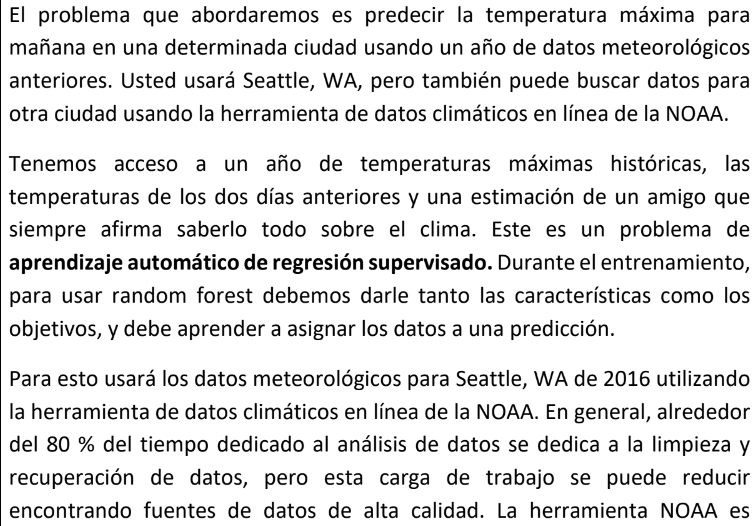

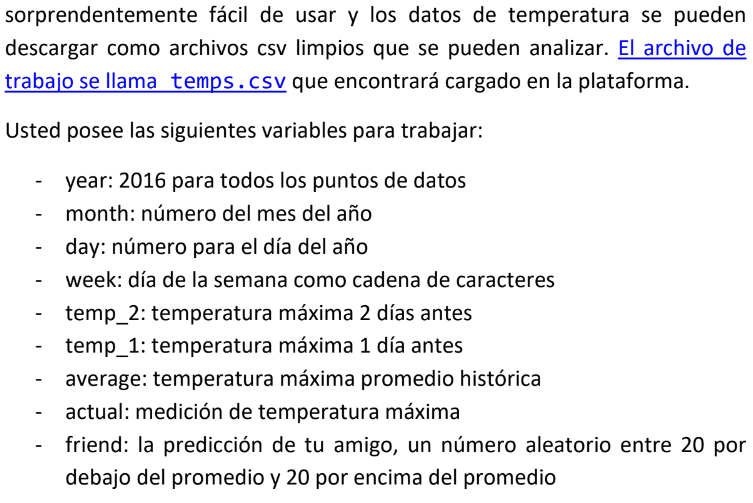

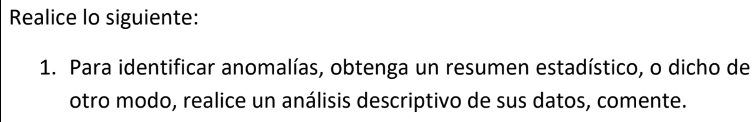

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar set de datos
df = pd.read_csv('temps.csv')

df.head(15)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
5,2016,1,6,Wed,40,44,46.1,51,43,49,48,40
6,2016,1,7,Thurs,44,51,46.2,45,45,49,46,38
7,2016,1,8,Fri,51,45,46.3,48,43,47,46,34
8,2016,1,9,Sat,45,48,46.4,50,46,50,45,47
9,2016,1,10,Sun,48,50,46.5,52,45,48,48,49


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [5]:
# Contar valores nulos de cada columna
df.isnull().sum()

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

In [6]:
# Se puede observar que el dataframe no tiene valores nulos. Por otro lado las temperaturas temp2, temp1 y actual tienen 
# los mismos minimos y maximos, por lo que sus rangos son identicos. También se observa que sus medias y desviaciones 
# estandar son muy parecidas. 

# Tambien a simple vista se puede observar que no hay valores atipicos en el dataframe, ya que los valores maximos y minimos
 # de cada columna no estan muy alejados de la media.

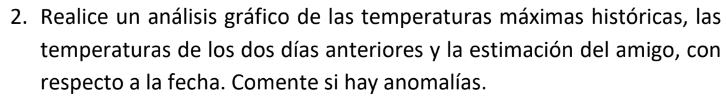

In [7]:
# crear columna de fecha en el dataframe que esta compuesta por los campos year, month y day
df['fecha'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,fecha
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,2016-01-01
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2016-01-02
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,2016-01-03
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,2016-01-04
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2016-01-05


Text(0.5, 1.0, 'actual vs fecha')

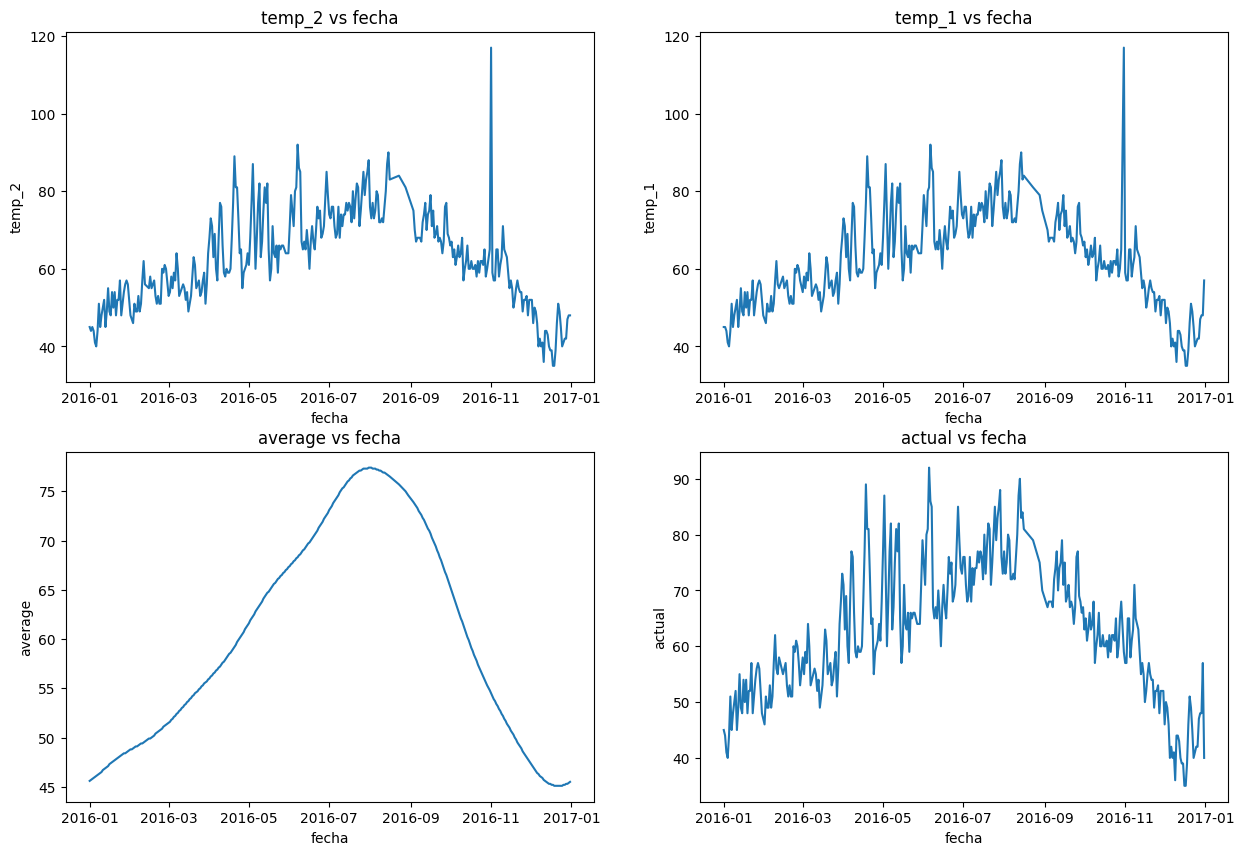

In [8]:
# graficar temp2 temp1 average y actual en funcion de la fecha
fig ,axs = plt.subplots(2,2, figsize=(15,10))
sns.lineplot(data=df, x='fecha', y='temp_2', ax=axs[0,0])
sns.lineplot(data=df, x='fecha', y='temp_1', ax=axs[0,1])
sns.lineplot(data=df, x='fecha', y='average', ax=axs[1,0])
sns.lineplot(data=df, x='fecha', y='actual', ax=axs[1,1])

# Agregar titulos
axs[0,0].set_title('temp_2 vs fecha')
axs[0,1].set_title('temp_1 vs fecha')
axs[1,0].set_title('average vs fecha')
axs[1,1].set_title('actual vs fecha')



In [9]:
#  Como se puede ver de los gráficos de linea la temp2 y temp1 tienen un comportamiento similar, esto se debe a que la variable temp2 es
# la misma que la temp1 pero rezagada un periodo atrás, por lo que habría un lag de un día que separa las dos variables.
# En cambio, la variable average tiene un comporamiento muy suavizado y poco ruidoso, esto se debe a que es la media de las 
# variables temp2 y temp1. Por último, la variable "actual" tiene un comportamiento similar a temp2 y temp1. 

# En general las 4 variables, han tenido un comportamiento similar a lo largo del tiempo, es decir que empiezan a subir las temperaturas
# y luego de un tiempo empiezan a bajar de manera gradual.


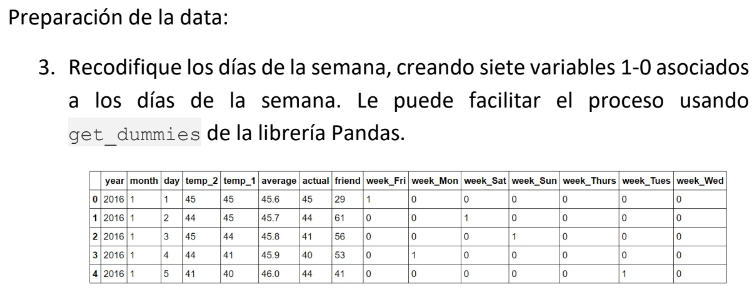

In [10]:
# Eliminar variables no utilizadas
df2 = df.drop(columns=['forecast_noaa', 'forecast_acc', 'forecast_under'])

# Generar variables dummies para la columna week
df3 = pd.get_dummies(df2, columns=['week'])
df3.head()

,year,month,day,temp_2,temp_1,average,actual,friend,fecha,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,2016-01-01,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,2016-01-02,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,2016-01-03,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,2016-01-04,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,2016-01-05,0,0,0,0,0,1,0


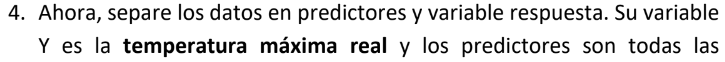

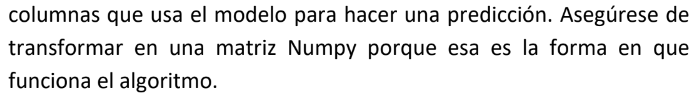

In [11]:
# Definir matriz Y con la variable actual y X con el resto de variables
y = df3['actual'].values
X = df3.drop(columns=['actual', 'fecha']).values

X.shape,y.shape

((348, 14), (348,))

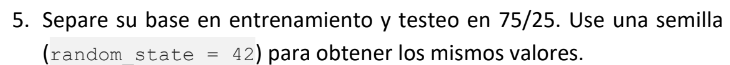

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

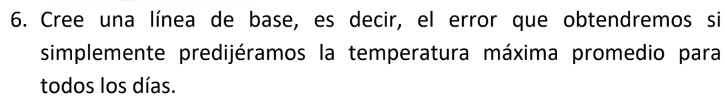

In [14]:
baseline_prediction = np.full_like(y_test, np.mean(y_train)) 
# el código de arriba sirve para crear un arreglo del mismo shape que y_test pero con el valor promedio de y_train

In [26]:
baseline_prediction , baseline_prediction.shape , y_test.shape

(array([62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62,
        62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62,
        62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62,
        62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62,
        62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62,
        62, 62], dtype=int64),
 (87,),
 (87,))

In [16]:
# calcular mae, mape , mse y rmse 
baseline_mae = np.mean(np.abs(baseline_prediction - y_test))
baseline_mape = np.mean(np.abs((baseline_prediction - y_test)/y_test))
baseline_mse = np.mean((baseline_prediction - y_test)**2)
baseline_rmse = np.sqrt(baseline_mse)

print('MAE: ', baseline_mae)
print('MAPE: ', baseline_mape)
print('MSE: ', baseline_mse)
print('RMSE: ', baseline_rmse)



MAE:  9.586206896551724
MAPE:  0.15748439668740075
MSE:  140.09195402298852
RMSE:  11.836044695040169


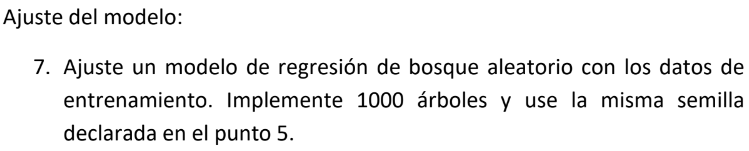

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
# Crear random forest de 100 trees y seed 5
modelo_random_forest = RandomForestRegressor(n_estimators=100, random_state=5)

# Ajustar con datos de entrenamiento
modelo_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=5)

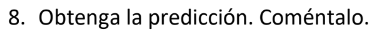

In [19]:
# Generar prediccion con datos de test
y_pred = modelo_random_forest.predict(X_test)
y_pred

array([68.76, 60.45, 51.86, 60.35, 66.35, 70.92, 81.62, 79.17, 62.32,
       72.3 , 64.34, 72.1 , 39.01, 62.29, 71.5 , 55.7 , 60.69, 56.92,
       57.07, 77.03, 63.55, 54.39, 65.63, 62.61, 58.04, 52.33, 66.76,
       46.99, 62.57, 79.08, 74.88, 64.47, 56.  , 79.73, 73.68, 62.29,
       53.49, 50.45, 67.63, 43.45, 70.34, 57.36, 77.18, 42.95, 61.14,
       74.26, 52.58, 79.81, 53.95, 41.53, 47.81, 42.52, 64.66, 65.79,
       74.33, 60.72, 55.16, 59.85, 53.55, 59.84, 66.25, 51.02, 59.79,
       70.05, 60.16, 59.39, 70.96, 69.24, 75.64, 40.32, 77.86, 56.65,
       60.75, 49.5 , 53.95, 63.06, 44.06, 76.24, 49.34, 52.11, 53.19,
       68.48, 72.53, 74.21, 63.34, 58.47, 47.74])

Text(0.5, 1.0, 'Prediccion vs valor real')

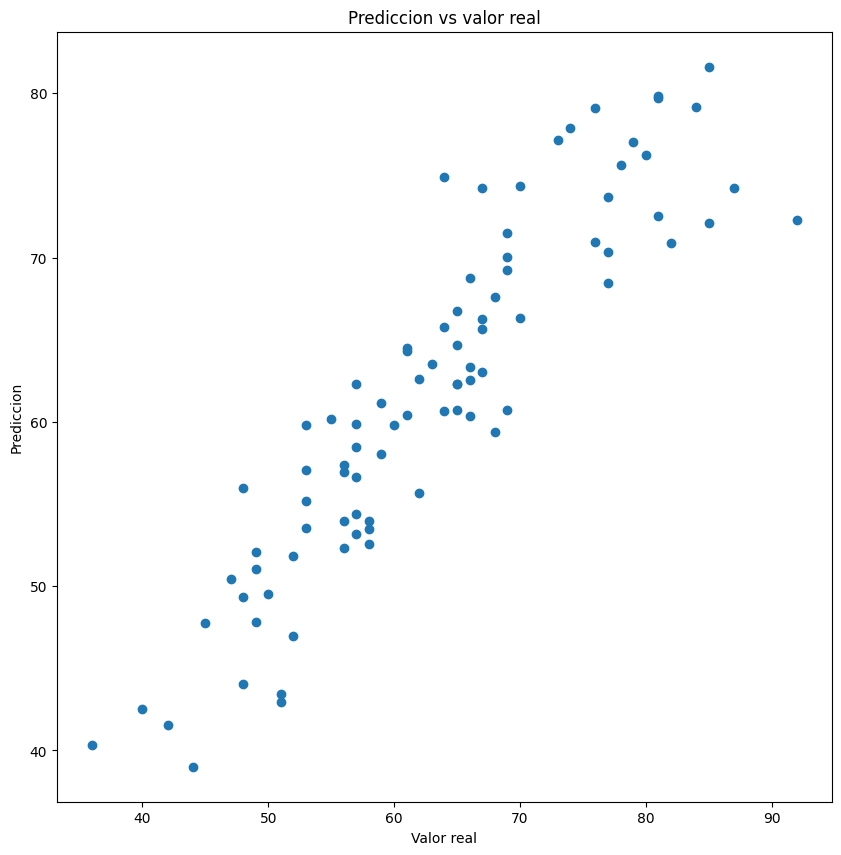

In [20]:
# Graficar prediccion vs valor real
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Valor real')
plt.ylabel('Prediccion')
plt.title('Prediccion vs valor real')


In [21]:
# Como se puede observar las predicciones se acercan bastante a los valores reales (ya que tienen una pendiente positiva y con datos poco
# dispersos), por lo que el modelo a simple vista parece poder predecir bastante bien la variable explicada.

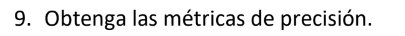

In [22]:
# caluclar mae, mape, mse , rmse y r2

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_pred - y_test)/y_test))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('MAPE: ', mape)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)


MAE:  3.8774712643678164
MAPE:  0.06077091058261409
MSE:  26.088634482758618
RMSE:  5.107703445067912
R2:  0.8124048800507689


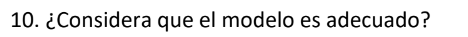

In [23]:
# Del modelo Random Forest entrenado, se obtiene predicciones con menos error que el baseline anterior, por lo que se 
# puede decir que el modelo Random Forest es bastante mejor que el baseline. Además tiene un coeficiente de determinación de 0.812, lo que 
# indica que el modelo es capaz de explicar cerca del 81.2% la variabilidad de los datos, por lo cual es un buen modelo predictivo.

# Considero que un modelo que pueda explicar mas del 80% de la variabilidad de los datos es un buen modelo. Sin embargo,
# siempre se puede utilizar GridSearchCV para encontrar los mejores hiperparametros del modelo y así ir mejorando los resultados. 